In [3]:
%%time
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE,RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from itertools import combinations 
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
import copy 

Using TensorFlow backend.
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtype

CPU times: user 1.84 s, sys: 288 ms, total: 2.13 s
Wall time: 4.22 s


In [4]:
df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)
df.columns

Index(['net_acc_mean', 'net_acc_std', 'net_acc_min', 'net_acc_max',
       'ACC_x_mean', 'ACC_x_std', 'ACC_x_min', 'ACC_x_max', 'ACC_y_mean',
       'ACC_y_std', 'ACC_y_min', 'ACC_y_max', 'ACC_z_mean', 'ACC_z_std',
       'ACC_z_min', 'ACC_z_max', 'BVP_mean', 'BVP_std', 'BVP_min', 'BVP_max',
       'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EDA_mean', 'EDA_std',
       'EDA_min', 'EDA_max', 'EDA_phasic_mean', 'EDA_phasic_std',
       'EDA_phasic_min', 'EDA_phasic_max', 'EDA_smna_mean', 'EDA_smna_std',
       'EDA_smna_min', 'EDA_smna_max', 'EDA_tonic_mean', 'EDA_tonic_std',
       'EDA_tonic_min', 'EDA_tonic_max', 'EMG_mean', 'EMG_std', 'EMG_min',
       'EMG_max', 'Resp_mean', 'Resp_std', 'Resp_min', 'Resp_max', 'TEMP_mean',
       'TEMP_std', 'TEMP_min', 'TEMP_max', 'c_ACC_x_mean', 'c_ACC_x_std',
       'c_ACC_x_min', 'c_ACC_x_max', 'c_ACC_y_mean', 'c_ACC_y_std',
       'c_ACC_y_min', 'c_ACC_y_max', 'c_ACC_z_mean', 'c_ACC_z_std',
       'c_ACC_z_min', 'c_ACC_z_max', 'c_Temp_mean',

In [5]:
features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)

features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

p_d=pd.read_csv('personal_detail.csv',index_col=0)

df_new_1=df_new.merge(p_d,on='subject')
df_new_1

70


/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,label,age,height,weight,gender_ female,coffee_today_YES,sport_today_YES,smoker_YES,feel_ill_today_YES,bmi
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,0,27,175,80,0,0,0,0,0,1
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,0,27,175,80,0,0,0,0,0,1
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,0,27,175,80,0,0,0,0,0,1
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,0,27,175,80,0,0,0,0,0,1
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,0,27,175,80,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.029484,0.002074,0.020918,0.053804,-0.004624,0.002074,-0.015439,0.017447,-0.000003,1.427082e-06,...,1,29,165,55,1,0,0,0,0,0
1244,0.032744,0.000516,0.029211,0.034857,-0.029334,0.000516,-0.031478,-0.025832,-0.000020,3.552867e-07,...,2,29,165,55,1,0,0,0,0,0
1245,0.030006,0.007051,0.002966,0.070357,-0.027424,0.007051,-0.067796,-0.000404,-0.000019,4.851210e-06,...,2,29,165,55,1,0,0,0,0,0
1246,0.031250,0.001534,0.027188,0.038575,-0.031250,0.001534,-0.038575,-0.027188,-0.000022,1.055452e-06,...,2,29,165,55,1,0,0,0,0,0


In [6]:
sel_fea = ['EDA_tonic_mean','EDA_smna_mean','EDA_tonic_min','EDA_phasic_mean','TEMP_std','BVP_peak_freq','smoker_YES','ACC_y_min','ACC_x_mean','weight','gender_ female','c_Temp_max','ACC_x_max','TEMP_mean',
          'c_ACC_y_std','net_acc_max','Resp_std']

<BarContainer object of 1248 artists>

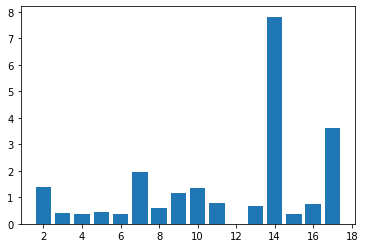

In [38]:
plt.bar( df_new_1['subject'],df_new_1['EDA_smna_mean'])
#plt.xticks(list(df_new_1['subject'].unique()))